### CS 216 Project
##### Cameron Jarnot (cmj36), Delaney Demark (dad48), Joseph Scarpa (jcs140), Sharan Sokhi (ss1148)

In [1]:
# Imports (update throughout as necessary)
import numpy as np
import pandas as pd
import seaborn as sns
import math

#### Data loading and cleaning

Notes:
* No null values found
* No duplicate values found

In [2]:
# Data loading
data10 = pd.read_csv('./datasets/dataset-of-10s.csv')
data00 = pd.read_csv('./datasets/dataset-of-00s.csv')
data90 = pd.read_csv('./datasets/dataset-of-90s.csv')
data80 = pd.read_csv('./datasets/dataset-of-80s.csv')
data70 = pd.read_csv('./datasets/dataset-of-70s.csv')
data60 = pd.read_csv('./datasets/dataset-of-60s.csv')

In [3]:
# Data cleaning
data10 = data10.dropna()
data00 = data00.dropna()
data90 = data90.dropna()
data80 = data80.dropna()
data70 = data70.dropna()
data60 = data60.dropna()
# NOTE: Nothing is actually NA so nothing is truly dropped

# Add a decades column to each dataset (will be helpful when creating cumulative dataset)
data10['decade'] = [2010]*len(data10)
data00['decade'] = [2000]*len(data00)
data90['decade'] = [1990]*len(data90)
data80['decade'] = [1980]*len(data80)
data70['decade'] = [1970]*len(data70)
data60['decade'] = [1960]*len(data60)

In [4]:
# Check for duplicates in dataset
merged = data10.merge(data00,on=['track','artist'])
merged = merged.merge(data90,on=['track','artist'])
merged = merged.merge(data80,on=['track','artist'])
merged = merged.merge(data70,on=['track','artist'])
merged = merged.merge(data60,on=['track','artist'])
merged
# NOTE: No duplicates found

,uri_x,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,...,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,time_signature_y,chorus_hit_y,sections_y,target_y,decade_y


In [5]:
# Create cumulative dataset (from songs across all decades)
data = data10.append(data00).append(data90).append(data80).append(data70).append(data60)
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1,2010
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0,2010
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1,2010
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0,2010
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1,2010


In [32]:
#Custom columns that might be used generally. 
data["duration_sec"] = np.round(data["duration_ms"]*(1/1000))
data["duration_sec"]

data["loudness_rounded"] = np.round(data["loudness"])
data["loudness_rounded"]


0       -5.0
1      -15.0
2       -7.0
3       -6.0
4       -4.0
        ... 
8637   -12.0
8638    -6.0
8639   -23.0
8640    -8.0
8641    -8.0
Name: loudness_rounded, Length: 41106, dtype: float64

#### General statistics
Means, medians, modes, standard deviations of each column for both unique decades and the overall dataset

Notes:
* All values are stored in the dataframe named "general_stats"

In [7]:
# General stats (means, medians, standard deviations, etc) for each column (decades and overall)
# Sharan
general_stats = pd.DataFrame()


# Some code I accidentally wrote that may help get you started. 
loudness_stats = data.groupby('decade')['loudness'].describe().reset_index()
loudness_stats

energy_stats = data.groupby('decade')['energy'].describe().reset_index()
energy_stats

speechiness_stats = data.groupby('decade')['speechiness'].describe().reset_index()
speechiness_stats

danceability_stats = data.groupby('decade')['danceability'].describe().reset_index()
danceability_stats

valence_stats = data.groupby('decade')['valence'].describe().reset_index()
valence_stats

tempo_stats = data.groupby('decade')['tempo'].describe().reset_index()
tempo_stats

instrumentalness_stats = data.groupby('decade')['instrumentalness'].describe().reset_index()
instrumentalness_stats

duration_stats = data.groupby('decade')['duration_ms'].describe().reset_index()
duration_stats


,decade,count,mean,std,min,25%,50%,75%,max
0,1960,8642.0,183638.344133,100574.385376,15168.0,141070.25,162746.5,193230.00,2516987.0
1,1970,7766.0,239933.116405,144973.628855,20493.0,173220.00,210813.5,264973.25,3391040.0
2,1980,6908.0,254756.410394,107321.347928,29514.0,204546.75,241860.0,287016.75,2223827.0
3,1990,5520.0,256210.994022,103439.755825,19533.0,202753.25,246720.0,289907.00,1711800.0
4,2000,5872.0,258170.628236,139534.121208,15920.0,206813.00,238006.5,279160.00,4170227.0
5,2010,6398.0,236704.210378,85636.984343,29853.0,193206.75,221246.5,259316.50,1734201.0


In [8]:
# Add plots with data from basic analysis of data (decades and overall)
# Delaney

#### Decade by decade statistical analysis
Analysis of relationships between each column and 'hits' vs 'flops' for each decade

Notes:
* Results are stored in dataframe named "decade_by_decade"

In [9]:
# Decade by decade stat analysis (relationships between each decade and each column)
# Cameron
decade_by_decade = pd.DataFrame()

<AxesSubplot:xlabel='decade'>

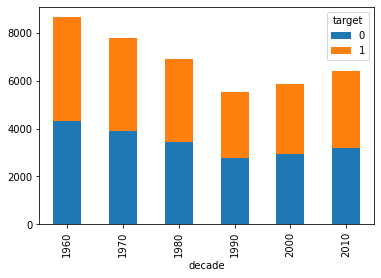

In [43]:
# Add plots with data from decade by decade stat analysis
# Cameron

pd.crosstab(data['decade'],data['target']).plot.bar(stacked = True)

#### Cumulative statistical analysis
Analysis of relationships between each column and 'hits' vs 'flops' for all decades overall

Notes:
* Results are stored in dataframe named "overall_stats"

#### Overall stat analysis (relationships between cumulative decades and each column) - data
##### Joey Scarpa


In [11]:
# Target proportion versus duration in seconds. 
bin_max = data["duration_sec"].max()
print(bin_max)
i = 1
bin_arr = []
while i * 10 < bin_max+10:
    bin_arr.append(i*10)
    i+=1
print(bin_arr)
bins = pd.cut(data['duration_sec'], bin_arr )
target_prop_by_duration = data.groupby(bins)['target'].agg(["mean", "count"]).reset_index().dropna()
#target_prop_by_duration

target_prop_by_duration_sliced = target_prop_by_duration[:82]
target_prop_by_duration_sliced.insert(0, 'ds_int', range(1, 1+ len(target_prop_by_duration_sliced)))
target_prop_by_duration_sliced["ds_int"] = target_prop_by_duration_sliced["ds_int"] *10
target_prop_by_duration_sliced

4170.0
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 18

,ds_int,duration_sec,mean,count
0,10,"(10, 20]",0.000000,5
1,20,"(20, 30]",0.000000,30
2,30,"(30, 40]",0.000000,63
3,40,"(40, 50]",0.012500,80
4,50,"(50, 60]",0.008850,113
...,...,...,...,...
77,780,"(780, 790]",0.000000,7
78,790,"(790, 800]",0.000000,5
79,800,"(800, 810]",0.000000,3
80,810,"(810, 820]",0.000000,7


In [23]:
#Target proportion vs energy

i = 0
bin_arr_energy = []
while i <= 100:
    bin_arr_energy.append(i/100)
    i+=1
print(bin_arr_energy)
bins_energy = pd.cut(data['energy'], bin_arr_energy)
target_prop_by_energy = data.groupby(bins_energy)['target'].agg(["mean", "count"]).reset_index().dropna()
#target_prop_by_energy = target_prop_by_energy.loc[target_prop_by_energy['count'] > 10]
target_prop_by_energy.insert(0, 'en_int', range(0, 100))
target_prop_by_energy["en_int"] = target_prop_by_energy["en_int"] / 100
target_prop_by_energy



[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


,en_int,energy,mean,count
0,0.00,"(0.0, 0.01]",0.000000,202
1,0.01,"(0.01, 0.02]",0.007937,126
2,0.02,"(0.02, 0.03]",0.067485,163
3,0.03,"(0.03, 0.04]",0.025316,158
4,0.04,"(0.04, 0.05]",0.034091,176
...,...,...,...,...
95,0.95,"(0.95, 0.96]",0.321101,436
96,0.96,"(0.96, 0.97]",0.207921,404
97,0.97,"(0.97, 0.98]",0.210660,394
98,0.98,"(0.98, 0.99]",0.113580,405


In [30]:
#Target proportion vs dancibility

i = 5
bin_arr_danceability = []
while i <= 98:
    bin_arr_danceability.append(i/100)
    i+=1

bins_danceability = pd.cut(data['danceability'], bin_arr_danceability)
target_prop_by_danceability = data.groupby(bins_danceability)['target'].agg(["mean", "count"]).reset_index().dropna()

target_prop_by_danceability.insert(0, 'da_int', range(5, 98))
target_prop_by_danceability["da_int"] = target_prop_by_danceability["da_int"] / 100


target_prop_by_danceability



,da_int,danceability,mean,count
0,0.05,"(0.05, 0.06]",0.000000,7
1,0.06,"(0.06, 0.07]",0.000000,40
2,0.07,"(0.07, 0.08]",0.000000,53
3,0.08,"(0.08, 0.09]",0.000000,58
4,0.09,"(0.09, 0.1]",0.014706,68
...,...,...,...,...
88,0.93,"(0.93, 0.94]",0.825397,63
89,0.94,"(0.94, 0.95]",0.755556,45
90,0.95,"(0.95, 0.96]",0.772727,22
91,0.96,"(0.96, 0.97]",0.789474,19


In [35]:
#Target proportion vs dancibility
target_prop_by_loudness = data.groupby("loudness_rounded")['target'].agg(["mean", "count"]).reset_index().dropna()
target_prop_by_loudness = target_prop_by_loudness.loc[target_prop_by_loudness['count'] > 10]


target_prop_by_loudness



,loudness_rounded,mean,count
6,-40.0,0.000000,11
7,-39.0,0.000000,13
8,-38.0,0.000000,11
9,-37.0,0.000000,15
10,-36.0,0.000000,19
11,-35.0,0.000000,20
12,-34.0,0.000000,28
13,-33.0,0.000000,33
14,-32.0,0.000000,42
15,-31.0,0.000000,59


In [49]:
#Target proportion vs valence
target_prop_by_valence = data.groupby("valence")['target'].agg(["mean", "count"]).reset_index().dropna()
target_prop_by_valence = target_prop_by_valence.loc[target_prop_by_valence['count'] > 10]

target_prop_by_valence



,valence,mean,count
0,0.0000,0.071429,14
117,0.0350,0.000000,11
118,0.0351,0.000000,12
125,0.0358,0.000000,14
129,0.0362,0.000000,14
...,...,...,...
1593,0.9760,0.608696,23
1594,0.9770,0.578947,19
1595,0.9780,0.533333,15
1596,0.9790,0.750000,12


In [38]:
#Target proportion vs mode
target_prop_by_mode = data.groupby("mode")['target'].agg(["mean", "count"]).reset_index().dropna()

target_prop_by_mode

,mode,mean,count
0,0,0.440143,12605
1,1,0.526473,28501


In [40]:
#Target proportion vs time signature
target_prop_by_time_signature = data.groupby("time_signature")['target'].agg(["mean", "count"]).reset_index().dropna()

target_prop_by_time_signature

,time_signature,mean,count
0,0,0.333333,3
1,1,0.191375,371
2,3,0.309896,3840
3,4,0.527785,36297
4,5,0.225210,595


#### Add plots with data from overall stat analysis - data
##### Joey Scarpa


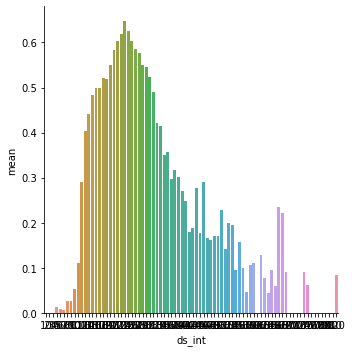

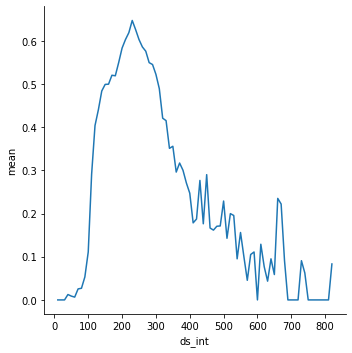

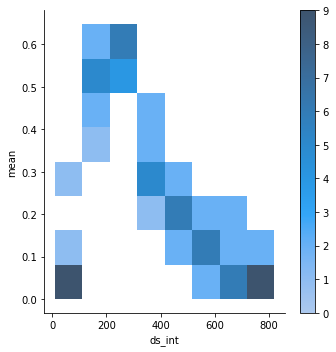

In [46]:
# Proportion of hits versus duration in seconds represented as a bar chart. 
sns.catplot(x = "ds_int", y = "mean", kind = "bar", data = target_prop_by_duration_sliced)
sns.relplot(x = "ds_int", y = "mean", data = target_prop_by_duration_sliced, kind = "line")
sns.displot(data = target_prop_by_duration_sliced, x = "ds_int", y = "mean", cbar = True)


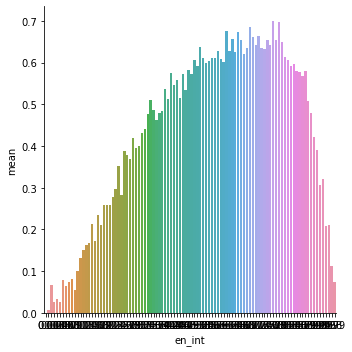

In [24]:
# Energy vs hits
sns.catplot(x = "en_int", y = "mean", kind = "bar", data = target_prop_by_energy)


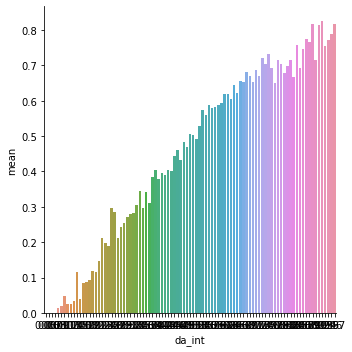

In [31]:
# Energy vs hits
sns.catplot(x = "da_int", y = "mean", kind = "bar", data = target_prop_by_danceability)


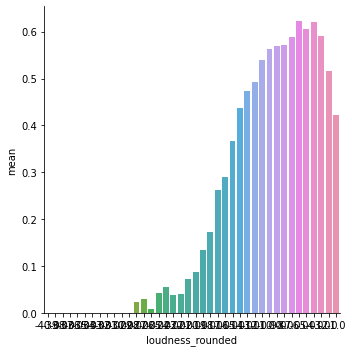

In [37]:
# Energy vs hits
sns.catplot(x = "loudness_rounded", y = "mean", kind = "bar", data = target_prop_by_loudness)


In [48]:
# Energy vs hits
sns.catplot(x = "valence", y = "mean", kind = "bar", data = target_prop_by_valence)


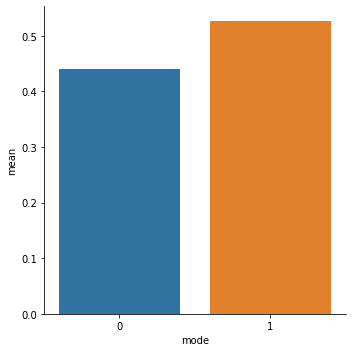

In [39]:
# Energy vs hits

# Good question to do hypothesis test on. 
sns.catplot(x = "mode", y = "mean", kind = "bar", data = target_prop_by_mode)


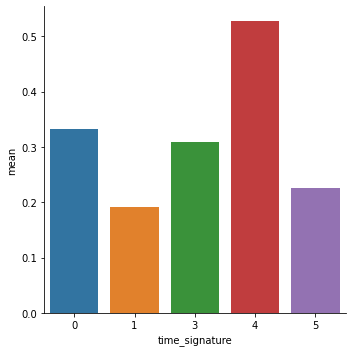

In [41]:
# Energy vs hits

# Good question to do hypothesis test on. 
sns.catplot(x = "time_signature", y = "mean", kind = "bar", data = target_prop_by_time_signature)


To do

In [14]:
# Hypothesis tests for changes across decades
# Brainstorm - Tackle on the 24th October

In [15]:
# Linear regression of trends in factors making a hit across each decade (maybe one per column?)
# Brainstorm - Tackle on the 24th October

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=162d76af-48a2-4f75-9aef-34643a48aa39' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>